# Sign Laguage Detection Model

## Create Label Maps

In [18]:
import string

capital_letters = string.ascii_uppercase
labels = []
    
for i, letter in enumerate(capital_letters):
    label = {
                'name': letter, 
                'id': i+1
    }
    labels.append(label)

with open( './data/label_map.pbtxt' , 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('    id:{}\n'.format(label['id']))
        f.write('    name:\'{}\'\n'.format(label['name']))
        f.write('}\n')

## Create TF-Records

In [8]:
!python generate_tfrecord.py -x images/train -l data/label_map.pbtxt -o data/train.record

Successfully created the TFRecord file: data/train.record


In [9]:
!python generate_tfrecord.py -x images/test -l data/label_map.pbtxt -o data/test.record

Successfully created the TFRecord file: data/test.record


## Model Hyper-parameter setting and Training

In [10]:
PATH_TO_MODEL = "faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8"

In [11]:
!code './training/TF2/training/'{PATH_TO_MODEL}'/pipeline.config'

In [16]:
!python model_main_tf2.py --model_dir=training/TF2/training/{PATH_TO_MODEL} --pipeline_config_path=training/TF2/training/{PATH_TO_MODEL}/pipeline.config --num_train_steps=30000 --alsologtostderr

2023-05-19 18:15:49.599794: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-05-19 18:15:50.989217: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-05-19 18:15:51.021714: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-19 18:15:51.022160: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.755GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2023-05-19 18:15:51.022182: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-05-19 18:15:51.024479: I tensorflow/stream_executor/

Instructions for updating:
Use `tf.data.Dataset.map()
W0519 18:15:51.442462 140268298912128 deprecation.py:330] From /home/msc1/anaconda3/envs/Object-Detection-API/lib/python3.8/site-packages/object_detection/builders/dataset_builder.py:236: DatasetV1.map_with_legacy_function (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.Dataset.map()
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
W0519 18:15:54.945455 140268298912128 deprecation.py:330] From /home/msc1/anaconda3/envs/Object-Detection-API/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206: sparse_to_dense (from tensorflow.python.ops.sparse_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Instructions for updating:
Use `tf.cast` instead.
W0519 18:15:57.298744 140268298

INFO:tensorflow:Step 25400 per-step time 0.109s
I0519 18:17:26.512168 140268298912128 model_lib_v2.py:698] Step 25400 per-step time 0.109s
INFO:tensorflow:{'Loss/BoxClassifierLoss/classification_loss': 0.1204192,
 'Loss/BoxClassifierLoss/localization_loss': 0.037687898,
 'Loss/RPNLoss/localization_loss': 0.0,
 'Loss/RPNLoss/objectness_loss': 0.006070762,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 0.16417786,
 'learning_rate': 0.0003463193}
I0519 18:17:26.512321 140268298912128 model_lib_v2.py:701] {'Loss/BoxClassifierLoss/classification_loss': 0.1204192,
 'Loss/BoxClassifierLoss/localization_loss': 0.037687898,
 'Loss/RPNLoss/localization_loss': 0.0,
 'Loss/RPNLoss/objectness_loss': 0.006070762,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 0.16417786,
 'learning_rate': 0.0003463193}
INFO:tensorflow:Step 25500 per-step time 0.110s
I0519 18:17:37.482794 140268298912128 model_lib_v2.py:698] Step 25500 per-step time 0.110s
INFO:tensorflow:{'Loss/BoxClassifierLoss/classi

INFO:tensorflow:Step 26100 per-step time 0.115s
I0519 18:18:43.708720 140268298912128 model_lib_v2.py:698] Step 26100 per-step time 0.115s
INFO:tensorflow:{'Loss/BoxClassifierLoss/classification_loss': 0.024221998,
 'Loss/BoxClassifierLoss/localization_loss': 0.026880633,
 'Loss/RPNLoss/localization_loss': 0.0,
 'Loss/RPNLoss/objectness_loss': 0.00018495908,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 0.05128759,
 'learning_rate': 0.00034322307}
I0519 18:18:43.708868 140268298912128 model_lib_v2.py:701] {'Loss/BoxClassifierLoss/classification_loss': 0.024221998,
 'Loss/BoxClassifierLoss/localization_loss': 0.026880633,
 'Loss/RPNLoss/localization_loss': 0.0,
 'Loss/RPNLoss/objectness_loss': 0.00018495908,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 0.05128759,
 'learning_rate': 0.00034322307}
INFO:tensorflow:Step 26200 per-step time 0.110s
I0519 18:18:54.687985 140268298912128 model_lib_v2.py:698] Step 26200 per-step time 0.110s
INFO:tensorflow:{'Loss/BoxClassifierL

INFO:tensorflow:Step 27100 per-step time 0.117s
I0519 18:20:33.743982 140268298912128 model_lib_v2.py:698] Step 27100 per-step time 0.117s
INFO:tensorflow:{'Loss/BoxClassifierLoss/classification_loss': 0.17965294,
 'Loss/BoxClassifierLoss/localization_loss': 0.068010025,
 'Loss/RPNLoss/localization_loss': 0.065426156,
 'Loss/RPNLoss/objectness_loss': 0.030063981,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 0.34315312,
 'learning_rate': 0.0003386752}
I0519 18:20:33.744133 140268298912128 model_lib_v2.py:701] {'Loss/BoxClassifierLoss/classification_loss': 0.17965294,
 'Loss/BoxClassifierLoss/localization_loss': 0.068010025,
 'Loss/RPNLoss/localization_loss': 0.065426156,
 'Loss/RPNLoss/objectness_loss': 0.030063981,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 0.34315312,
 'learning_rate': 0.0003386752}
INFO:tensorflow:Step 27200 per-step time 0.110s
I0519 18:20:44.775898 140268298912128 model_lib_v2.py:698] Step 27200 per-step time 0.110s
INFO:tensorflow:{'Loss/BoxCla

INFO:tensorflow:Step 28100 per-step time 0.116s
I0519 18:22:24.672160 140268298912128 model_lib_v2.py:698] Step 28100 per-step time 0.116s
INFO:tensorflow:{'Loss/BoxClassifierLoss/classification_loss': 0.005261274,
 'Loss/BoxClassifierLoss/localization_loss': 0.027981253,
 'Loss/RPNLoss/localization_loss': 0.0,
 'Loss/RPNLoss/objectness_loss': 0.0013781731,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 0.034620702,
 'learning_rate': 0.00033398485}
I0519 18:22:24.672310 140268298912128 model_lib_v2.py:701] {'Loss/BoxClassifierLoss/classification_loss': 0.005261274,
 'Loss/BoxClassifierLoss/localization_loss': 0.027981253,
 'Loss/RPNLoss/localization_loss': 0.0,
 'Loss/RPNLoss/objectness_loss': 0.0013781731,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 0.034620702,
 'learning_rate': 0.00033398485}
INFO:tensorflow:Step 28200 per-step time 0.110s
I0519 18:22:35.637568 140268298912128 model_lib_v2.py:698] Step 28200 per-step time 0.110s
INFO:tensorflow:{'Loss/BoxClassifierL

INFO:tensorflow:Step 29100 per-step time 0.116s
I0519 18:24:15.595967 140268298912128 model_lib_v2.py:698] Step 29100 per-step time 0.116s
INFO:tensorflow:{'Loss/BoxClassifierLoss/classification_loss': 0.061521117,
 'Loss/BoxClassifierLoss/localization_loss': 0.013877644,
 'Loss/RPNLoss/localization_loss': 0.08738353,
 'Loss/RPNLoss/objectness_loss': 0.004740861,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 0.16752315,
 'learning_rate': 0.0003291568}
I0519 18:24:15.596167 140268298912128 model_lib_v2.py:701] {'Loss/BoxClassifierLoss/classification_loss': 0.061521117,
 'Loss/BoxClassifierLoss/localization_loss': 0.013877644,
 'Loss/RPNLoss/localization_loss': 0.08738353,
 'Loss/RPNLoss/objectness_loss': 0.004740861,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 0.16752315,
 'learning_rate': 0.0003291568}
INFO:tensorflow:Step 29200 per-step time 0.110s
I0519 18:24:26.593278 140268298912128 model_lib_v2.py:698] Step 29200 per-step time 0.110s
INFO:tensorflow:{'Loss/BoxCla

## Create infernece Graph:

In [17]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path ./training/TF2/training/{PATH_TO_MODEL}/pipeline.config --trained_checkpoint_dir ./training/TF2/training/{PATH_TO_MODEL}/ --output_directory ./training/TF2/training/{PATH_TO_MODEL}/saved_model/

2023-05-19 18:34:47.294455: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-05-19 18:34:48.783122: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-05-19 18:34:48.812045: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-19 18:34:48.812345: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.755GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2023-05-19 18:34:48.812360: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-05-19 18:34:48.816147: I tensorflow/stream_executor/

/home/msc1/anaconda3/envs/Object-Detection-API/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '

FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
W0519 18:35:26.456844 140124459118976 save.py:1239] FOR KERAS USERS: The object that you are saving contains one or more Keras models or layers. If you are loading the SavedModel with `tf.keras.models.load_model`, continue reading (otherwise, you may ignore the following instructions). Please change your code to save with `tf.keras.models.save_model` or `model.save`, and confirm that the file "keras.metad

## Model Inferencing:

In [20]:
import matplotlib.pyplot as plt

In [21]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import pathlib
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
# Suppress TensorFlow logging (1)
# Suppress TensorFlow logging (2)
# Enable GPU dynamic memory allocation

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    
IMAGE_PATHS = 'test_images/'


In [22]:
PATH_TO_MODEL = "faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8"

In [23]:
PATH_TO_MODEL_DIR = './training/TF2/training/{}/saved_model/saved_model/'.format(PATH_TO_MODEL)

In [24]:
print(PATH_TO_MODEL_DIR)

./training/TF2/training/faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8/saved_model/saved_model/


In [25]:
PATH_TO_LABELS = './data/label_map.pbtxt'

In [26]:
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR

print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model...Done! Took 7.721994638442993 seconds


In [27]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

Running inference for test_images/K13_jpg.rf.d544147ca4794793e996cbe309fbcf28.jpg... Done
Running inference for test_images/X24_jpg.rf.ed6474bd56983fbdb13576b2c3e9c0b7.jpg... Done
Running inference for test_images/V2_jpg.rf.f887a9d681a64f8a2efe8375245ab4bb.jpg... Done
Running inference for test_images/Z9_jpg.rf.fd5bb2f80d391b73a85bbbd5bc5accc1.jpg... Done
Running inference for test_images/A22_jpg.rf.f02ad8558ce1c88213b4f83c0bc66bc8.jpg... Done
Running inference for test_images/I0_jpg.rf.21bbe6c53fdee3de18552752ab116502.jpg... Done
Running inference for test_images/G3_jpg.rf.e723dcdc277f3432e4eb7003b6e5a587.jpg... Done
Running inference for test_images/I20_jpg.rf.48cb8523d8325ef59931ca058774bf5e.jpg... Done


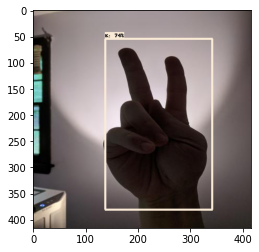

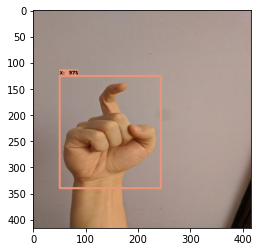

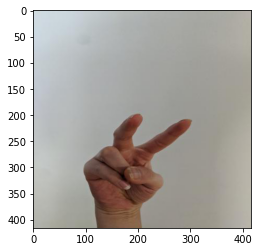

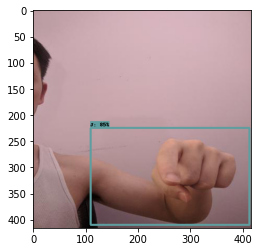

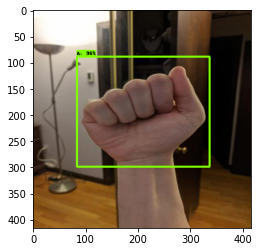

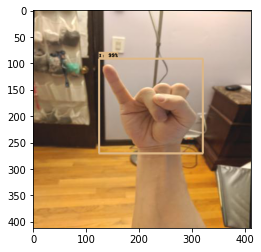

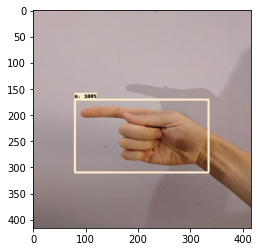

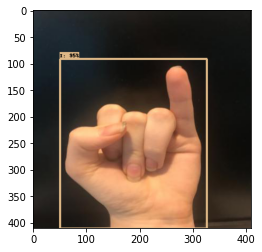

In [28]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings
%matplotlib inline

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))


for image_path in os.listdir(IMAGE_PATHS):
    image_path = os.path.join(IMAGE_PATHS, image_path)
    

    print('Running inference for {}... '.format(image_path), end='')

    image_np = load_image_into_numpy_array(image_path)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.7,
          agnostic_mode=False)

    plt.figure()
    plt.imshow(image_np_with_detections)
    print('Done')
plt.show()